In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def sum_product(a,w,bias):
    return sum([a[i]*w[i] for i in range(len(w))])+bias


******** Iterate   0 *********
  ------> Forward Pass ------>
  Layer 2: h1 =0.593270, h2 =0.596884
  Layer 3: y1_=0.751365, y2_=0.772928
  ** The total loss is 0.298371 **

  <------ Backwards Pass <------
  dJ_dw5 = +0.082167, w5_new = 0.358916
  dJ_dw6 = +0.082668, w6_new = 0.408666
  dJ_dw7 = -0.022603, w7_new = 0.511301
  dJ_dw8 = -0.022740, w8_new = 0.561370
  dJ_dw1 = +0.000439, w1_new = 0.149781
  dJ_dw2 = +0.000877, w2_new = 0.199561
  dJ_dw3 = +0.000498, w3_new = 0.249751
  dJ_dw4 = +0.000995, w4_new = 0.299502
  dJ_db2 = +0.100400, b2_new = 0.549800
  dJ_db1 = +0.018726, b1_new = 0.340637

******** Iterate   1 *********
  ------> Forward Pass ------>
  Layer 2: h1 =0.590996, h2 =0.594615
  Layer 3: y1_=0.732024, y2_=0.765985
  ** The total loss is 0.285751 **

  <------ Backwards Pass <------
  dJ_dw5 = +0.083706, w5_new = 0.317063
  dJ_dw6 = +0.084219, w6_new = 0.366557
  dJ_dw7 = -0.023732, w7_new = 0.523167
  dJ_dw8 = -0.023877, w8_new = 0.573309
  dJ_dw1 = +0.000366, w1

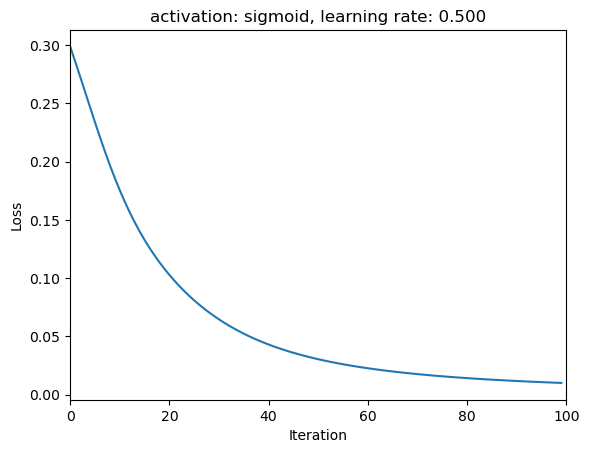

In [2]:
w_layer1 = [0.15, 0.2, 0.25, 0.3]
w_layer2 = [0.4, 0.45, 0.5, 0.55]
b_layer1 = 0.35
b_layer2 = 0.60
x = [0.05, 0.10]
y = [0.01, 0.99]
eta = 0.5

n_round = 100
L = np.zeros(n_round)
for round in range(n_round):
    print("\n******** Iterate %3d *********" % round)
    # Feed Forward Pass
    print("  ------> Forward Pass ------>")
    # Layer 2 (hidden layer)
    z = sum_product(x,w_layer1[:2],b_layer1);
    h1 = sigmoid(z)
    z = sum_product(x,w_layer1[2:4],b_layer1);
    h2 = sigmoid(z)
    print("  Layer 2: h1 =%.6f, h2 =%.6f" % (h1,h2))

    # Layer 3 (output layer)
    z = sum_product([h1,h2],w_layer2[:2],b_layer2);
    y1_ = sigmoid(z)
    z = sum_product([h1,h2],w_layer2[2:4],b_layer2);
    y2_ = sigmoid(z)
    print("  Layer 3: y1_=%.6f, y2_=%.6f" % (y1_,y2_))

    # The MSE loss
    [y1,y2] = y
    J1 = 0.5*(y1-y1_)**2
    J2 = 0.5*(y2-y2_)**2
    J = J1 + J2
    L[round] = J
    print("  ** The total loss is %.6f **\n" % J)

    # Backwards Pass
    print("  <------ Backwards Pass <------")
    # Weights for layer 2
    [w5,w6,w7,w8] = w_layer2
    dJ_dy1_ = y1_ - y1
    dy1__dz = y1_*(1-y1_)
    dz_dw5 = h1
    dJ_dw5 = dJ_dy1_ * dy1__dz * dz_dw5
    w5_new = w5 - eta*dJ_dw5
    print("  dJ_dw5 = %+.6f, w5_new = %.6f" % (dJ_dw5, w5_new))

    dz_dw6 = h2
    dJ_dw6 = dJ_dy1_ * dy1__dz * dz_dw6
    w6_new = w6 - eta*dJ_dw6
    print("  dJ_dw6 = %+.6f, w6_new = %.6f" % (dJ_dw6, w6_new))

    dJ_dy2_ = y2_-y2
    dy2__dz = y2_*(1-y2_)
    dz_dw7 = h1
    dJ_dw7 = dJ_dy2_ * dy2__dz * dz_dw7
    w7_new = w7 - eta*dJ_dw7
    print("  dJ_dw7 = %+.6f, w7_new = %.6f" % (dJ_dw7, w7_new))

    dz_dw8 = h2
    dJ_dw8 = dJ_dy2_ * dy2__dz * dz_dw8
    w8_new = w8 - eta*dJ_dw8
    print("  dJ_dw8 = %+.6f, w8_new = %.6f" % (dJ_dw8, w8_new))

    # Weights for layer 1
    [w1,w2,w3,w4] = w_layer1
    dJ1_dh1 = dJ_dy1_ * dy1__dz * w5
    dJ2_dh1 = dJ_dy2_ * dy2__dz * w7
    dJ_dh1 = dJ1_dh1 + dJ2_dh1
    dh1_dz = h1*(1-h1)
    dz_dw1 = x[0]
    dJ_dw1 = dJ_dh1 * dh1_dz * dz_dw1
    w1_new = w1 - eta*dJ_dw1
    #print("dJ1_dh1 = %.6f, dJ2_dh2 = %.6f" % (dJ1_dh1,dJ2_dh1))
    print("  dJ_dw1 = %+.6f, w1_new = %.6f" % (dJ_dw1, w1_new))

    dz_dw2 = x[1]
    dJ_dw2 = dJ_dh1 * dh1_dz * dz_dw2
    w2_new = w2 - eta*dJ_dw2
    print("  dJ_dw2 = %+.6f, w2_new = %.6f" % (dJ_dw2, w2_new))

    dJ1_dh2 = dJ_dy1_ * dy1__dz * w6
    dJ2_dh2 = dJ_dy2_ * dy2__dz * w8
    dJ_dh2 = dJ1_dh2 + dJ2_dh2
    dh2_dz = h2*(1-h2)
    dz_dw3 = x[0]
    dJ_dw3 = dJ_dh2 * dh2_dz * dz_dw3
    w3_new = w3 - eta* dJ_dw3
    print("  dJ_dw3 = %+.6f, w3_new = %.6f" % (dJ_dw3, w3_new))

    dz_dw4 = x[1]
    dJ_dw4 = dJ_dh2 * dh2_dz * dz_dw4
    w4_new = w4 - eta* dJ_dw4
    print("  dJ_dw4 = %+.6f, w4_new = %.6f" % (dJ_dw4, w4_new))

    # bias
    dJ1_db2 = dJ_dy1_ * dy1__dz * 1
    dJ2_db2 = dJ_dy2_ * dy2__dz * 1
    dJ_db2 = dJ1_db2 + dJ2_db2
    b2_new = b_layer2 - eta*dJ_db2
    print("  dJ_db2 = %+.6f, b2_new = %.6f" % (dJ_db2, b2_new))

    dJ1_db1 = dJ_dh1 * dh1_dz * 1
    dJ2_db1 = dJ_dh2 * dh2_dz * 1
    dJ_db1 = dJ1_db1 + dJ2_db1
    b1_new = b_layer1 - eta*dJ_db1
    print("  dJ_db1 = %+.6f, b1_new = %.6f" % (dJ_db1, b1_new))

    # update all the weights
    w_layer1 = [w1_new,w2_new,w3_new,w4_new]
    w_layer2 = [w5_new,w6_new,w7_new,w8_new]
    b_layer1 = b1_new
    b_layer2 = b2_new

import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(n_round),L)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xlim([0,n_round])
plt.title("activation: sigmoid, learning rate: %.3f" % eta)
#plt.savefig("w1-example-loss-sigmoid.png")
plt.show()
